# Photon Emission Protocol — Random Connected Graph

Solve the photon-emission protocol for a **random simple connected graph** with $n = 10$ vertices and 12 edges.

We first solve with the default qubit ordering, then use `optimal_emission_order` to find a permutation that minimises the peak height (number of emitters), and re-solve with the optimal ordering.

In [1]:
import numpy as np

from emission import (
    StabilizerState,
    circuit_solver,
    protocol_executor,
    generators_equivalence,
    operation_to_quantikz,
    compile_quantikz_pdf,
    plot_graph,
    plot_height_function,
    optimal_emission_order,
)

## 1. Define the graph

A random connected simple graph with 10 vertices and 12 edges.

In [2]:
filename = 'RandomGraph10'
n = 10

# Random connected simple graph (generated with seed 42)
edges = [
    (0, 4), (0, 5), (1, 5), (1, 8), (1, 9),
    (2, 5), (3, 4), (4, 6), (5, 7), (5, 8),
    (5, 9), (7, 9),
]

Gamma = np.zeros((n, n), dtype=np.int8)
for i, j in edges:
    Gamma[i, j] = 1
    Gamma[j, i] = 1

print('Adjacency matrix Gamma:')
print(Gamma)

Adjacency matrix Gamma:
[[0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 1]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 1 0 0 0]
 [1 1 1 0 0 0 0 1 1 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 1 0 0]]


## 2. Plot the graph

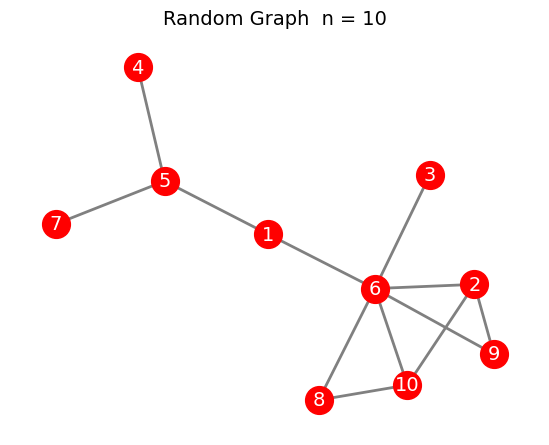

In [3]:
plot_graph(n, edges, title=f'Random Graph  n = {n}')

## 3. Solve with default ordering

	** The protocol is SOLVED correctly! **
Default ordering: Emitters = 3
Height function:  [0 1 2 3 3 3 3 2 2 1 0]


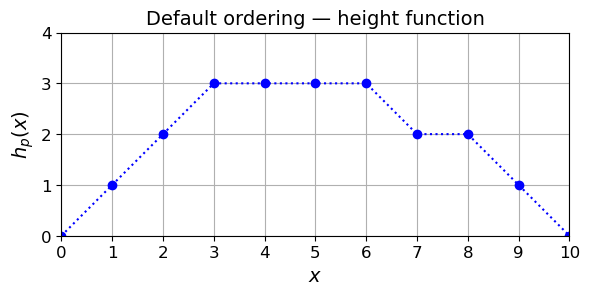

In [4]:
xs0 = np.eye(n, dtype=np.int8)
zs0 = Gamma.astype(np.int8)
gen0 = StabilizerState(xs0, zs0, np.zeros(n, dtype=np.int8))

op0, inv_op0, stat0 = circuit_solver(gen0)
print(f'Default ordering: Emitters = {stat0["EmittersNumber"]}')
print(f'Height function:  {stat0["HeightFunc"]}')
plot_height_function(stat0['HeightFunc'], title='Default ordering — height function')

## 4. Find optimal emission ordering

Search over all $n!$ qubit permutations (since $n \le 10$) to find the one
that minimises the peak height function, i.e. the number of emitters.

Best permutation: [0 2 3 5 4 6 1 7 8 9]
Optimal h_max:    2  (was 3 with default ordering)
Height function:  [0 1 2 2 2 2 1 2 2 1 0]


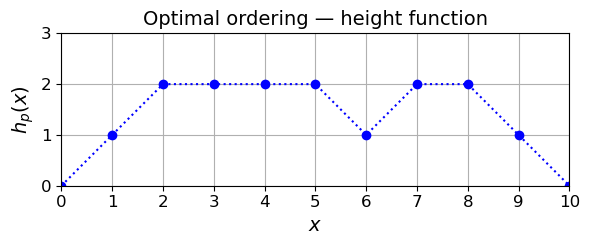

In [5]:
best_perm, best_h, best_hmax = optimal_emission_order(xs0, zs0, seed=0)

print(f'Best permutation: {best_perm}')
print(f'Optimal h_max:    {best_hmax}  (was {stat0["EmittersNumber"]} with default ordering)')
print(f'Height function:  {best_h}')
plot_height_function(best_h, title='Optimal ordering — height function')

## 5. Solve with optimal ordering

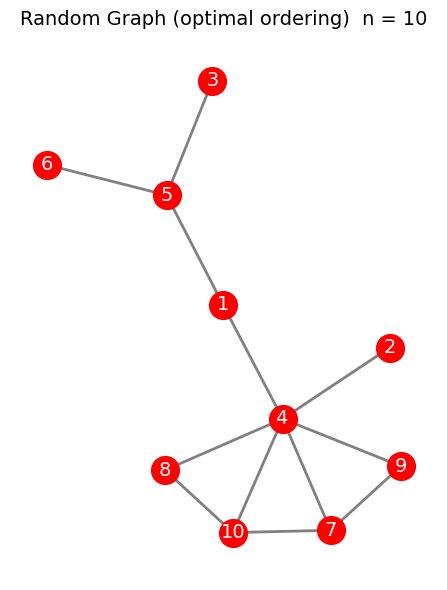

	** The protocol is SOLVED correctly! **
Optimal ordering: Emitters = 2
Height function:  [0 1 2 2 2 2 1 2 2 1 0]


In [6]:
# Apply the optimal permutation to Gamma
Gamma_opt = Gamma[np.ix_(best_perm, best_perm)]

# Derive the edge list from the permuted adjacency matrix
edges_opt = [(i, j) for i in range(n) for j in range(i + 1, n) if Gamma_opt[i, j]]

# Plot the graph under the optimal ordering
plot_graph(n, edges_opt, title=f'Random Graph (optimal ordering)  n = {n}')

xs_opt = np.eye(n, dtype=np.int8)
zs_opt = Gamma_opt.astype(np.int8)
gen_opt = StabilizerState(xs_opt, zs_opt, np.zeros(n, dtype=np.int8))

op_opt, inv_op_opt, stat_opt = circuit_solver(gen_opt)
print(f'Optimal ordering: Emitters = {stat_opt["EmittersNumber"]}')
print(f'Height function:  {stat_opt["HeightFunc"]}')

## 6. Verify by forward simulation

In [7]:
_, g_phi = protocol_executor(inv_op_opt, stat_opt['EmittersNumber'], stat_opt['PhotonsNumber'])
equiv = generators_equivalence(gen_opt, g_phi)
print('Equivalence check:')
for k, v in equiv.items():
    print(f'  {k}: {v}')

Equivalence check:
  Overall: True
  Tableau: True
  SignVector: True


## 7. Generate quantikz circuit and compile PDF

	** The quantikz code for latex has been saved as: quantikz_RandomGraph10.txt **
	** PDF compiled: quantikz_RandomGraph10.pdf **


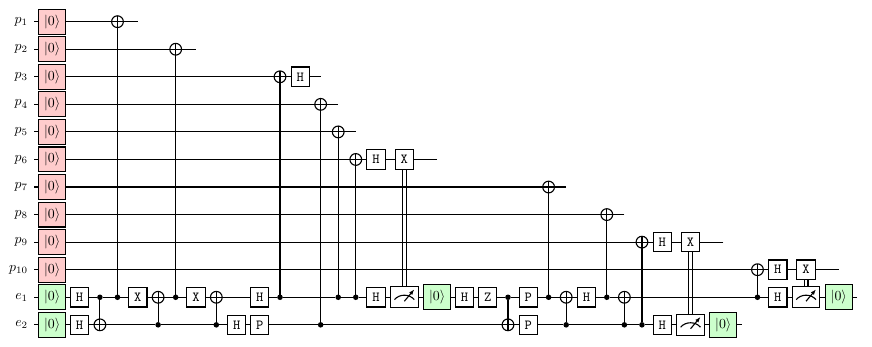

In [8]:
operation_to_quantikz(op_opt, stat_opt['PhotonsNumber'], stat_opt['EmittersNumber'], filename)
compile_quantikz_pdf(filename)

## 8. Plot the optimised height function

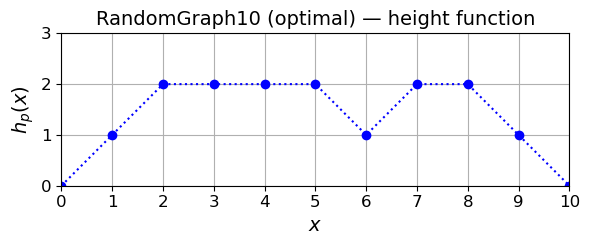

Height function: [0 1 2 2 2 2 1 2 2 1 0]


In [9]:
plot_height_function(stat_opt['HeightFunc'], title=f'{filename} (optimal) — height function')
print(f'Height function: {stat_opt["HeightFunc"]}')